# OSA-CASE STUDY

### PCA WITH CLASSIFICATION DATASET

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_excel('../DATA/OSA_EXTREME_DF_MALES_CLASSIFICATION.xlsx')

In [3]:
data = data.set_index('Patient')
df_OSA = data.drop(['Gender','IAH','OSA','Smoker', 'Snorer', 'Illness'], axis=1)
Y=data[['OSA']]

In [4]:
scaler = StandardScaler()
scaler.fit(df_OSA)
X_scaled = scaler.transform(df_OSA)


print(df_OSA[0:5])
print(Y[0:5])

X_train, X_test, y_train, y_test = train_test_split(df_OSA, Y, test_size=0.2, random_state=0)


         Weight  Height        BMI  Age   Cervical
Patient                                           
P0005        80     173  26.729927   32  40.000000
P0006       109     190  30.193906   32  42.000000
P0007        86     169  30.110991   39  42.000000
P0008       145     172  49.012980   47  44.000000
P0012        69     169  24.158818   48  42.133612
             OSA
Patient         
P0005    Healthy
P0006    Healthy
P0007     Severe
P0008     Severe
P0012    Healthy


In [5]:
# Verify normalization:

# Zero mean
print('Features means after normalization \n',
     list(np.mean(X_scaled,axis=0)))

print('\nStandard deviation after normalization \n',
     list(np.std(X_scaled,axis=0)))

print('\nStandard deviation before normalization \n',
     list(np.std(np.array(df_OSA, dtype=np.float64),axis=0)))

Features means after normalization 
 [-7.054124632997385e-17, -1.0869764775391425e-15, -4.1042179682893875e-16, -1.4749533323539986e-16, 7.823665502051644e-16]

Standard deviation after normalization 
 [1.0, 1.0, 0.9999999999999999, 1.0, 1.0]

Standard deviation before normalization 
 [18.452451918188647, 7.381893809499685, 5.423709454288217, 12.168854193976964, 3.361299255407975]


In [6]:
n_components = 5
n_2 = 0.95

pca = PCA(n_components = n_components)
pca_2 = PCA(n_components = n_2)

pca.fit(X_scaled)
pca_2.fit(X_scaled)

PC1 = pca.components_[0]
PC2 = pca.components_[1]
PC3 = pca.components_[2]
PC4 = pca.components_[3]
PC5 = pca.components_[4]

<BarContainer object of 5 artists>

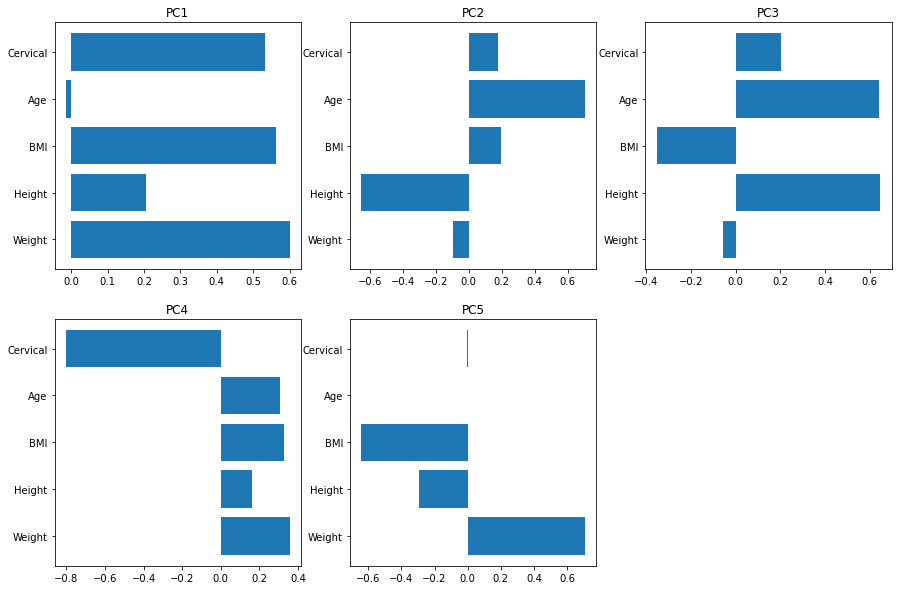

In [7]:
features = df_OSA.columns
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(232)
plt.title("PC2")
plt.barh(features,PC2)
plt.subplot(233)
plt.title("PC3")
plt.barh(features,PC3)
plt.subplot(234)
plt.title("PC4")
plt.barh(features,PC4)
plt.subplot(235)
plt.title("PC5")
plt.barh(features,PC5)

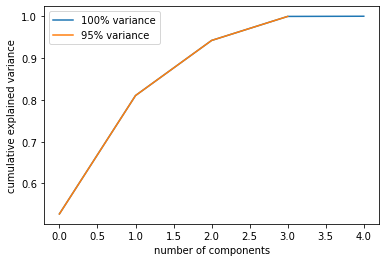

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = '100% variance')

plt.plot(np.cumsum(pca_2.explained_variance_ratio_), label = '95% variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend()

Text(0, 0.5, 'Second Principal Component')

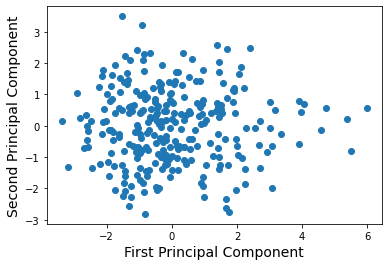

In [9]:
Z1 = pca.transform(X_scaled)[:,0]
Z2 = pca.transform(X_scaled)[:,1]


plt.scatter(Z1,Z2)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)

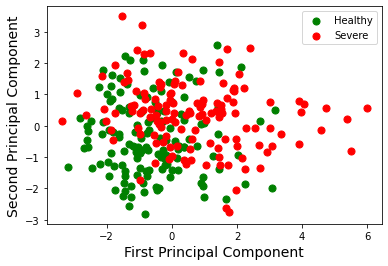

In [10]:
group = data['OSA']
cdict = {'Severe': 'red', 'Healthy': 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z2[ix], c = cdict[g], label = g, s = 50)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
ax.legend()

In [11]:
coeff = np.transpose(pca.components_[0:2, :])

print(coeff)
print(features)

[[ 0.59956778 -0.09532721]
 [ 0.20588455 -0.6532118 ]
 [ 0.5619041   0.19376905]
 [-0.01458411  0.70427859]
 [ 0.53120723  0.17513504]]
Index(['Weight', 'Height', 'BMI', 'Age', 'Cervical'], dtype='object')


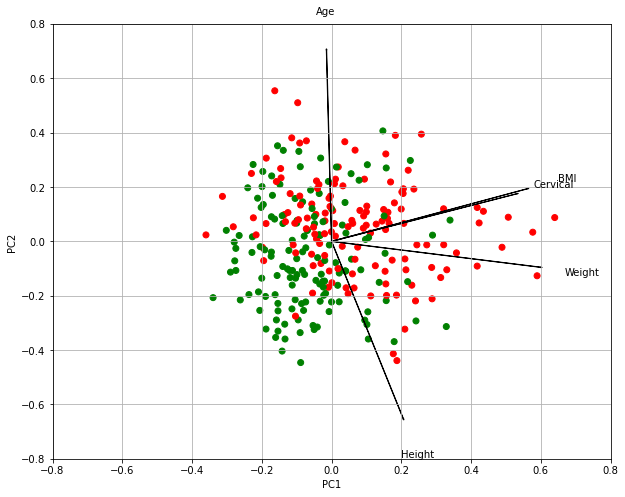

In [12]:
x_new = pca.transform(X_scaled)

color= ['red' if l == 'Severe' else 'green' for l in data['OSA']]

    

def myplot(score,coeff,n_var,labels=None):
    # n_var number of variables to show in biplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = color)
    
    plot_scale = 1.2
    
    for i in range(n_var):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 1)
        if labels is None:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, features[i], color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-0.8,0.8)
    plt.ylim(-0.8,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10,8))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),5)
plt.show()

### PCA WITH REGRESSION DATASET

In [13]:
data = pd.read_excel('../DATA/OSA_EXTREME_DF_MALES_REGRESSION.xlsx')

In [14]:
conditions = [
    (data['IAH'] <= 10),
    (data['IAH'] > 10) & (data['IAH'] < 30),
    (data['IAH'] >= 30)
    ]
values = ['Healthy', 'Mid', 'Severe']
data.insert(3, "OSA", '', True)
data['OSA'] = np.select(conditions, values)

data = data.set_index('Patient')
df_OSA = data.drop(['IAH','OSA'], axis=1)
Y=data[['IAH']]

In [15]:
scaler = StandardScaler()
scaler.fit(df_OSA)
X_scaled = scaler.transform(df_OSA)


print(df_OSA[0:5])
print(Y[0:5])

X_train, X_test, y_train, y_test = train_test_split(df_OSA, Y, test_size=0.2, random_state=0)


         Gender  Weight  Height        BMI  Age   Cervical  Smoker  Snorer  \
Patient                                                                      
P0005         0      80     173  26.729927   32  40.000000       1       1   
P0006         0     109     190  30.193906   32  42.000000       1       1   
P0007         0      86     169  30.110991   39  42.000000       1       1   
P0008         0     145     172  49.012980   47  44.000000       1       1   
P0012         0      69     169  24.158818   48  42.133612       1       1   

         Illness  
Patient           
P0005          0  
P0006          0  
P0007          0  
P0008          0  
P0012          1  
          IAH
Patient      
P0005     9.0
P0006     2.0
P0007    34.0
P0008    60.0
P0012    10.0


In [16]:
# Verify normalization:

# Zero mean
print('Features means after normalization \n',
     list(np.mean(X_scaled,axis=0)))

print('\nStandard deviation after normalization \n',
     list(np.std(X_scaled,axis=0)))

print('\nStandard deviation before normalization \n',
     list(np.std(np.array(df_OSA, dtype=np.float64),axis=0)))

Features means after normalization 
 [0.0, -7.054124632997385e-17, -1.0869764775391425e-15, -4.1042179682893875e-16, -1.4749533323539986e-16, 7.823665502051644e-16, -1.9238521726356502e-17, 0.0, -4.488988402816517e-17]

Standard deviation after normalization 
 [0.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0]

Standard deviation before normalization 
 [0.0, 18.452451918188647, 7.381893809499685, 5.423709454288217, 12.168854193976964, 3.361299255407975, 0.6556298596341575, 0.538886514824033, 0.49944905719917]


In [17]:
n_components = 9
n_2 = 0.98

pca = PCA(n_components = n_components)
pca_2 = PCA(n_components = n_2)

pca.fit(X_scaled)
pca_2.fit(X_scaled)

PC1 = pca.components_[0]
PC2 = pca.components_[1]
PC3 = pca.components_[2]
PC4 = pca.components_[3]
PC5 = pca.components_[4]
PC6 = pca.components_[5]
PC7 = pca.components_[6]
PC8 = pca.components_[7]
PC9 = pca.components_[8]

<BarContainer object of 9 artists>

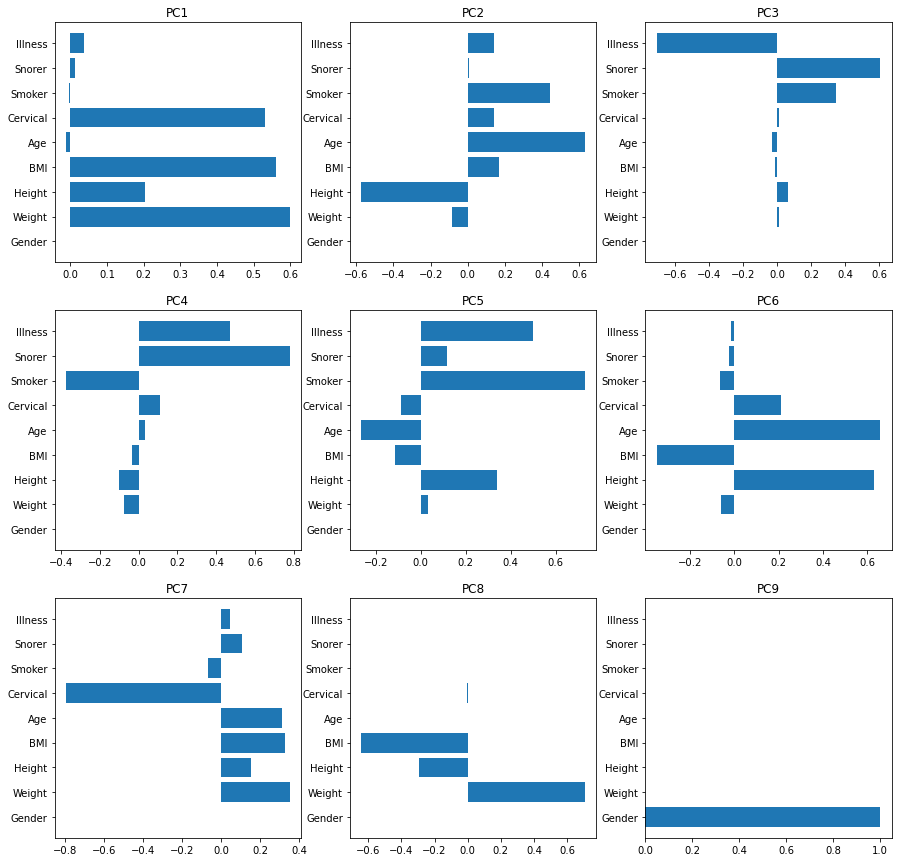

In [18]:
features = df_OSA.columns
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(332)
plt.title("PC2")
plt.barh(features,PC2)
plt.subplot(333)
plt.title("PC3")
plt.barh(features,PC3)
plt.subplot(334)
plt.title("PC4")
plt.barh(features,PC4)
plt.subplot(335)
plt.title("PC5")
plt.barh(features,PC5)
plt.subplot(336)
plt.title("PC6")
plt.barh(features,PC6)
plt.subplot(337)
plt.title("PC7")
plt.barh(features,PC7)
plt.subplot(338)
plt.title("PC8")
plt.barh(features,PC8)
plt.subplot(339)
plt.title("PC9")
plt.barh(features,PC9)

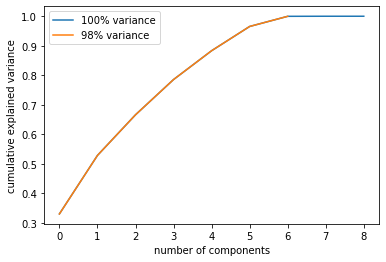

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = '100% variance')

plt.plot(np.cumsum(pca_2.explained_variance_ratio_), label = '98% variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend()

Text(0, 0.5, 'Second Principal Component')

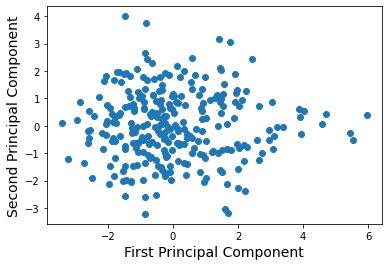

In [20]:
Z1 = pca.transform(X_scaled)[:,0]
Z2 = pca.transform(X_scaled)[:,1]


plt.scatter(Z1,Z2)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)

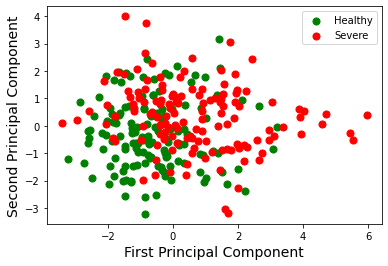

In [21]:
group = data['OSA']
cdict = {'Severe': 'red', 'Healthy': 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z2[ix], c = cdict[g], label = g, s = 50)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
ax.legend()

In [22]:
coeff = np.transpose(pca.components_[0:2, :])

print(coeff)
print(features)

[[-0.          0.        ]
 [ 0.59846624 -0.08484853]
 [ 0.2035613  -0.5737245 ]
 [ 0.56177417  0.16989844]
 [-0.01277165  0.63073832]
 [ 0.53205882  0.14343947]
 [-0.00350711  0.44273612]
 [ 0.01199343  0.00579323]
 [ 0.03748197  0.14255139]]
Index(['Gender', 'Weight', 'Height', 'BMI', 'Age', 'Cervical', 'Smoker',
       'Snorer', 'Illness'],
      dtype='object')


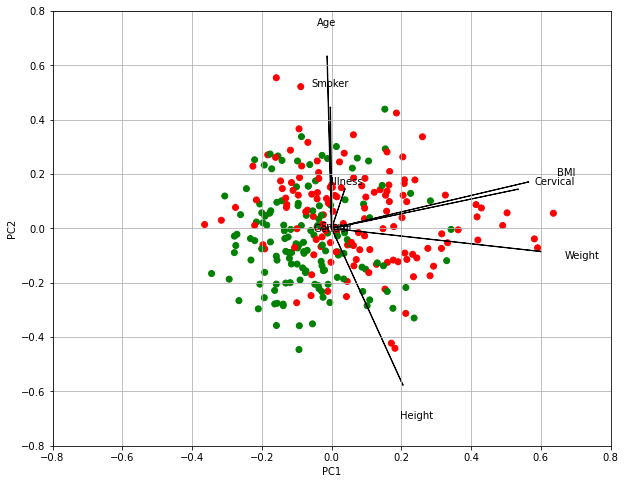

In [23]:
x_new = pca.transform(X_scaled)

color= ['red' if l == 'Severe' else 'green' for l in data['OSA']]

    

def myplot(score,coeff,n_var,labels=None):
    # n_var number of variables to show in biplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = color)
    
    plot_scale = 1.2
    
    for i in range(n_var):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 1)
        if labels is None:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, features[i], color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-0.8,0.8)
    plt.ylim(-0.8,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10,8))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),9)
plt.show()